In [15]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print (metrics.accuracy_score(y, y_pred))

0.96


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)
y_pred = knn.predict(X)
print (metrics.accuracy_score(y, y_pred))

0.98


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [64]:
# Logistic Regression
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)
print (metrics.accuracy_score(logreg_y_pred, y_test))

0.95


In [65]:
# KNN
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
print (metrics.accuracy_score(knn_y_pred, y_test))

0.95


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Testing Accuracy')

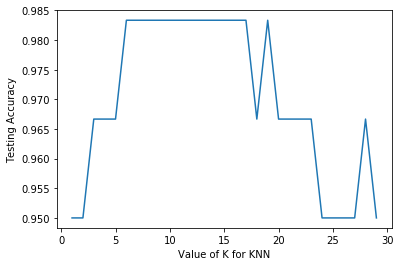

In [61]:
k_range = list(range(1, 30))
knn_accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_y_pred = knn.predict(X_test)
    knn_accuracy.append(metrics.accuracy_score(knn_y_pred, y_test))

plt.plot(k_range, knn_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [67]:
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [94]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [86]:
import seaborn as sns
%matplotlib inline
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


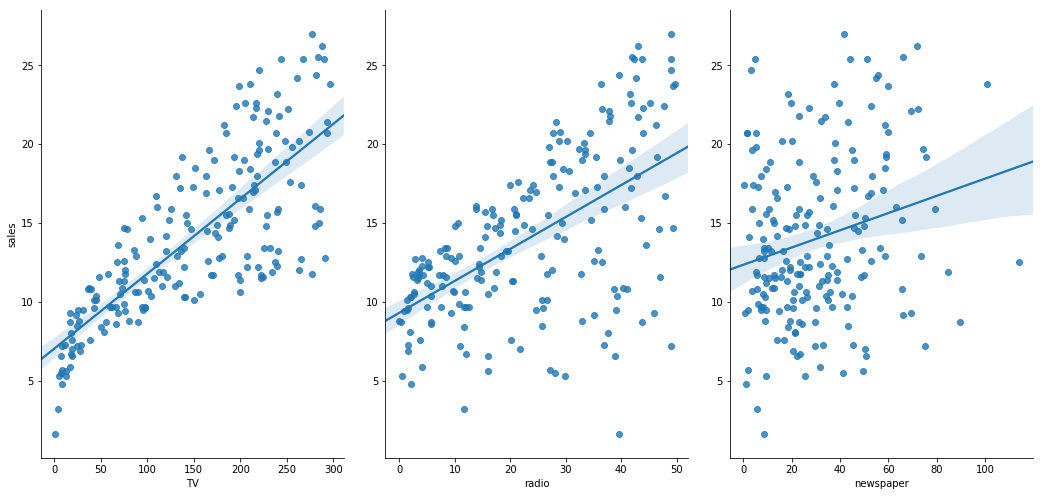

In [115]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [102]:
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

In [105]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [107]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [111]:
# make a prediction 
y_pred = linreg.predict(X_test)
# such as accuracy, are not useful for regression problems

In [113]:
import numpy as np
from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955
